# Chapter 2 linear regression with onevariable

In [1]:
###人工数据集生成

#要学习的函数为y=2x+1
#在Jupyter中，使用matplotlib显示图像需要设置为inline模式，否则不会显示图像

%matplotlib inline

import matplotlib.pyplot as plt #载入matplotlib
import numpy as np #载入numpy
import tensorflow as tf 

#设置随机数种子
np.random.seed(5)


### 

### 首先，生成输入数据
需要构造满足这个函数的x和y，同时加入一些不满足方程的噪声

注释方法1：选中要注释的代码，ctrl+/

注释方法2：在要注释的代码前后分别加三个'

In [2]:
#直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1，1之间

x_data = np.linspace(-1,1,100)

#y=2x+1+噪声，其中，噪声的维度和x_data的维度一致
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4


In [3]:
#numpy.random.randn(d0,d1,...dn)是从标准正态分布中返回i一个或多个样本值

random = np.random.randn(10)
# mean = np.mean(random) #numpy中计算均值的函数
# print(mean)
# variance = np.std(random)**2  #numpy中计算标准差的函数
# print(variance)

In [4]:
#x_data.shape值为一个元组

x_data.shape

(100,)

In [5]:
#实参的前面加上*和**时，就意味着拆包。单个*表示将元组拆成一个个单独的实参

np.random.randn(*x_data.shape)

array([ 0.04595522, -0.48713265,  0.81613236, -0.28143012, -2.33562182,
       -1.16727845,  0.45765807,  2.23796561, -1.4812592 , -0.01694532,
        1.45073354,  0.60687032, -0.37562084, -1.42192455, -1.7811513 ,
       -0.74790579, -0.36840953, -2.24911813, -1.69367504,  0.30364847,
       -0.40899234, -0.75483059, -0.40751917, -0.81262476,  0.92751621,
        1.63995407,  2.07361553,  0.70979786,  0.74715259,  1.46309548,
        1.73844881,  1.46520488,  1.21228341, -0.6346525 , -1.5996985 ,
        0.87715281, -0.09383245, -0.05567103, -0.88942073, -1.30095145,
        1.40216662,  0.46510099, -1.06503262,  0.39042061,  0.30560017,
        0.52184949,  2.23327081, -0.0347021 , -1.27962318,  0.03654264,
       -0.64635659,  0.54856784,  0.21054246,  0.34650175, -0.56705117,
        0.41367881, -0.51025606,  0.51725935, -0.30100513, -1.11840643,
        0.49852362, -0.70609387,  1.4438811 ,  0.44295626,  0.46770521,
        0.10134479, -0.05935198, -2.38669774,  1.22217056, -0.81

### 利用matplotlib画出生成结果 

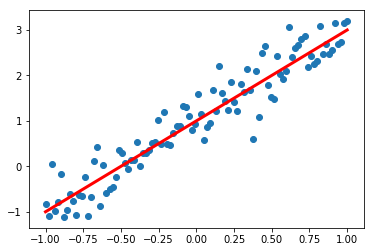

In [6]:
#画出随机生成的数据散点图
plt.scatter(x_data,y_data)

#画出目标线性函数y=2x+1

plt.plot(x_data,2 * x_data + 1.0,color = 'red',linewidth = 3)

### 构建模型 

In [7]:
#定义训练数据占位符，x是特征值，y是标签值

x = tf.placeholder("float", name = "x")
y = tf.placeholder("float", name = "y")

#定义回归模型函数
#构建线性函数的斜率，变量w
w = tf.Variable(1.0,name = "w0")

#构建线性函数的截距，变量b
b = tf.Variable(0.0,name = "b0")


def model(x, w, b):
    return tf.multiply(x, w) + b   #multiply(x ,y)表示x*y


#predict是预测值，前向计算
predict = model(x, w, b)

### 训练模型 

In [8]:
# 迭代次数（训练轮数）
train_epochs = 10

#学习率,一般是经验值
learning_rate = 0.05

###定义损失函数
#采用均方差作为损失函数

loss_function = tf.reduce_mean(tf.square(y-predict))

###定义优化器
#初始化一个GradientDescentOptimizer
#设置学习率和优化目标：最小化损失

#梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)


### 创建会话


In [9]:
#声明会话
sess = tf.Session()

#变量初始化并运行
init = tf.global_variables_initializer()
sess.run(init)

### 迭代训练

模型训练阶段，设置迭代轮次，每次通过将样本逐个输入模型，进行梯度下降优化操作，每轮迭代后，绘制出模型

1.9822965
1.0420128


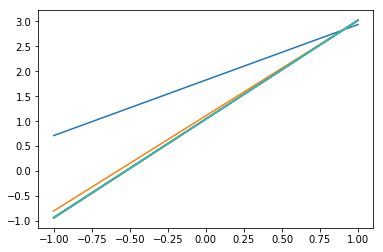

In [10]:
#开始训练，轮数为epoch，采用SGD随机梯度下降优化方法

for epoch in range(train_epochs):
    for xs,ys in zip(x_data, y_data):
        _,loss=sess.run([optimizer,loss_function], feed_dict={x: xs, y: ys})  #将xs，ys填充到占位符中
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    plt.plot(x_data, w0temp * x_data + b0temp )
print(sess.run(w))
print(sess.run(b))



## 利用模型  进行预测

In [22]:
x_test = 3.21

prediction = sess.run(predict, feed_dict={x: x_test})
print("预测值：",prediction)

target = 2*x_test + 1.0
print("实际值：",target)

预测值： 7.4051843
实际值： 7.42


## 显示损失值 